news    0
code    0
dtype: int64

뉴스 기사의 개수:  6127
    code  count
0  IT/과학   1138
1     경제    901
2     사회   2222
3  생활/문화   1866
파주 시청 사진제 공파 주시 파주 시청 사진 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재

훈련용 뉴스 기사의 개수 : 4595
테스트용 뉴스 기사의 개수 :  1532
훈련용 레이블의 개수 :  4595
테스트용 레이블의 개수 :  1532

              precision    recall  f1-score   support

       IT/과학       0.86      0.71      0.78       288
          경제       0.91      0.40      0.56       236
          사회       0.72      0.92      0.81       553
       생활/문화       0.75      0.80      0.77   

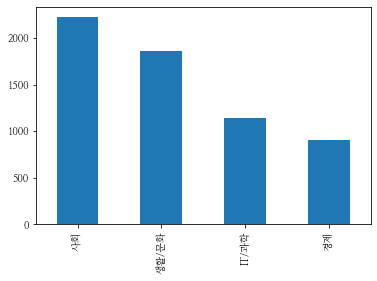

In [5]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup
import os

'''
# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
    news = requests.get(url)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
            
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

# url_list = make_urllist(2, 101, 20200506)
# print('뉴스 기사의 개수: ',(url_list))

idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다. 특정 코드에서 데이터 크롤링
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  return df

# 데이터 프레임 출력
# data = make_data(url_list, 101)
# print(data[:10])

code_list = [102, 103, 105]
# 코드별로 크롤링해서 데이터프레임 생성하는 함수
def make_total_data(page_num, code_list, date):
  df = None
  
  for code in code_list:
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  return df

df = make_total_data(1, code_list, 20200506)
# df 랜덤출력
# df.sample(10)
'''

# 저장한 csv파일 읽어서 데이터프레임에 저장하기
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df1 = pd.read_table(csv_path, sep=',')
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data2.csv"
df2 = pd.read_table(csv_path, sep=',')

df = df1.append(df2, ignore_index=True)
df.head()

# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

# 데이터 null값 확인
print(df.isnull().sum())

# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('\n뉴스 기사의 개수: ',len(df))

# 샘플 분포 확인하기
df['code'].value_counts().plot(kind = 'bar')

# 개수 확인
print(df.groupby('code').size().reset_index(name = 'count'))

# 토큰화 및 불용어 제거
from konlpy.tag import Mecab, Hannanum, Kkma
tokenizer = Mecab()
# tokenizer = Hannanum()
# tokenizer = Kkma()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스','이데일리','한국일보','구독','연합뉴스','서울경제','배포','요','타임스','제공','종합']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

# 데이터 전처리(토큰화 및 불용어 제거) 후 상태 확인
text_data = preprocessing(df['news'])
print(text_data[0])

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

# 훈련 데이터와 테스트 데이터 수 확인하기
print()
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))
print()

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# 텍스트을 입력하면 TF-IDF벡터로 바꾸는 전처리 함수
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

'''
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
'''

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

두 번째 데이터만 사용했을 경우 zero division 발생   
특정 random_state값에서 zero division 발생하지 않음   
첫 번째와 두 번째 데이터를 합치면 zero division 발생하지 않음   
훈련 데이터와 테스트 데이터 분류 문제?? 데이터 불균형??
불용ㅇ